In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [114]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_ids = train['ID']
test_ids = test['ID']

for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))
        train[c] = pd.get_dummies(train[c])
        test[c] = pd.get_dummies(test[c])

In [115]:
ys = train['y'].values.reshape(4209, 1)
xs = train.drop(['ID', 'y'], axis=1)
test = test.drop('ID', axis=1)

xs = xs.values
test = test.values

In [116]:
print("Train data shape: ", xs.shape)
print("Test data shape: ", ys.shape)

Train data shape:  (4209, 376)
Test data shape:  (4209, 1)


In [117]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=1, random_state=0)
xs = tsne.fit_transform(xs)
test = tsne.fit_transform(test)

In [118]:
X = tf.placeholder(dtype=tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [119]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
Y_pred = tf.add(tf.multiply(X, W), b)

In [120]:
# Mean squared error averaged over number of observations
cost = tf.reduce_sum(tf.pow(Y_pred - Y , 2)) / (tf.constant(4209.) - 1)

In [121]:
learning_rate = 0.008
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [122]:
n_epochs = 1000

In [123]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    prev_training_cost = 0.0
    for epoch_i in range(n_epochs):
        for (x, y) in zip(xs, ys):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        training_cost = sess.run(
            cost, feed_dict={X: xs, Y: ys})
        print(training_cost)

        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
        prev_training_cost = training_cost
    pred_y = sess.run(Y_pred, feed_dict={X: test})

9792.1
9490.23
9196.86
8912.46
8636.96
8370.12
8111.66
7861.34
7618.9
7384.09
7156.67
6936.41
6723.07
6516.46
6316.34
6122.53
5934.82
5753.01
5576.93
5406.39
5241.21
5081.23
4926.29
4776.22
4630.88
4490.09
4353.73
4221.67
4093.76
3969.88
3849.91
3733.72
3621.18
3512.19
3406.64
3304.41
3205.4
3109.48
3016.58
2926.61
2839.47
2755.09
2673.36
2594.2
2517.52
2443.26
2371.33
2301.68
2234.22
2168.87
2105.59
2044.3
1984.94
1927.44
1871.76
1817.82
1765.58
1714.99
1665.99
1618.52
1572.56
1528.04
1484.93
1443.17
1402.73
1363.54
1325.61
1288.85
1253.26
1218.78
1185.4
1153.05
1121.74
1091.4
1062.02
1033.57
1006.01
979.317
953.46
928.427
904.183
880.691
857.944
835.92
814.589
793.928
773.906
754.518
735.739
717.56
699.958
682.894
666.365
650.356
634.867
619.865
605.33
591.245
577.602
564.392
551.602
539.219
527.229
515.602
504.335
493.43
482.867
472.648
462.756
453.166
443.871
434.865
426.145
417.701
409.525
401.615
393.954
386.524
379.328
372.352
365.599
359.058
352.725
346.601
340.669
334.923
329.

In [124]:
pred_y = pd.DataFrame(pred_y)
pred_y['ID'] = test_ids
pred_y.columns = ['y', 'ID']
pred_y = pd.concat([pred_y['ID'], pred_y['y']], axis=1)
pred_y

,ID,y
0,1,99.509338
1,2,102.965584
2,3,99.566681
3,4,99.508774
4,5,100.716766
5,8,97.869499
6,10,103.200043
7,11,98.315872
8,12,98.571373
9,14,98.078796


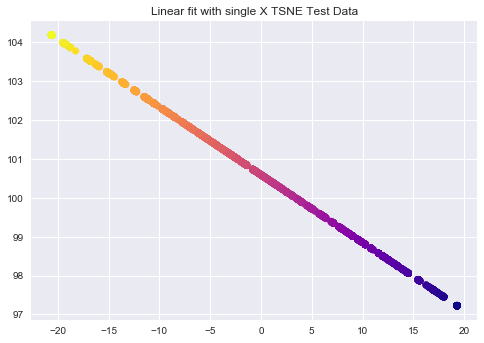

In [146]:
plt.scatter(x=test, y=pred_y['y'], c=pred_y['y'], cmap='plasma')
plt.title('Linear fit with single X TSNE Test Data')
plt.show()

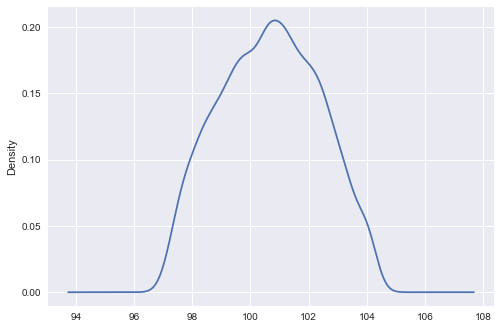

In [149]:
(pred_y['y']).plot(kind='kde')
plt.show()